# CNN For Fashion MNIST Dataset

Contains the code for CNN base model. 

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

#### Getting datasets

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.FashionMNIST(root='../data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='../data', train=False, download=True, transform=transform)

optim_acc = []

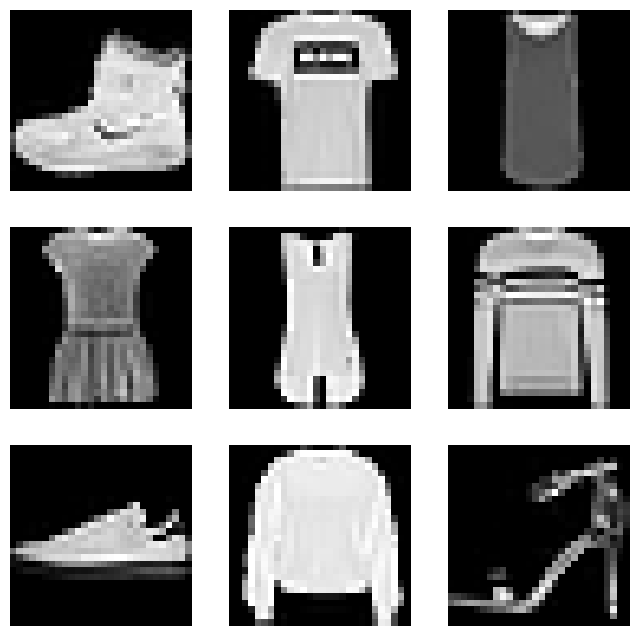

In [3]:
# plot the first few images
import matplotlib.pyplot as plt

def print_first_n_images(train_dataset, n):
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for i in range(n):
        image, label = train_dataset[i]
        ax = axes[i // 3, i % 3]
        ax.imshow(image.squeeze(), cmap='gray')
        ax.axis('off')
    plt.show()

print_first_n_images(train_dataset, 9)

#### CNN (Optimizer: SGD)

In [4]:
from test_harness import load_dataset, prep_pixels, define_model
from tqdm import tqdm
from torch import optim
import datetime

# optimal hyperparameters:
batch_size = 64
fc_layer_size = 512
activation_fn = nn.PReLU()

train_loader, test_loader = load_dataset(train_dataset, test_dataset, batch_size)
train_loader, test_loader = prep_pixels(train_loader, test_loader)

model = define_model(fc_layer_size, activation_fn)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

accuracies = []

best_accuracy = 0.0
patience_counter = 0

start_time = datetime.datetime.now()
for epoch in range(20):
    pbar = tqdm(enumerate(train_loader), total=len(train_loader))
    model.train()
    for i, (images, labels) in pbar:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i + 1) % 200 == 0:
            pbar.set_description(f'Epoch [{epoch + 1}/{20}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item()}')

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        pbar_test = tqdm(test_loader)
        for images, labels in pbar_test:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            pbar_test.set_description(f'Accuracy: {100 * correct / total:.2f}%')

        accuracy = 100 * correct / total
        accuracies.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            patience_counter = 0

        else:
            patience_counter += 1
            if patience_counter >= 3:
                print(f'Early stopping at epoch {epoch + 1}')
                break

end_time = datetime.datetime.now()
print(f'Final accuracy: {best_accuracy:.2f}%')
print(f'Training time: {end_time - start_time}')
optim_acc.append(best_accuracy)

Epoch [1/20], Step [800/938], Loss: 0.5136550664901733: 100%|██████████| 938/938 [01:11<00:00, 13.17it/s] 
Accuracy: 86.96%: 100%|██████████| 157/157 [00:06<00:00, 22.56it/s]
Epoch [2/20], Step [800/938], Loss: 0.2518886923789978: 100%|██████████| 938/938 [01:09<00:00, 13.47it/s] 
Accuracy: 88.04%: 100%|██████████| 157/157 [00:06<00:00, 23.27it/s]
Epoch [3/20], Step [800/938], Loss: 0.2793426215648651: 100%|██████████| 938/938 [01:08<00:00, 13.62it/s] 
Accuracy: 88.77%: 100%|██████████| 157/157 [00:06<00:00, 23.30it/s]
Epoch [4/20], Step [800/938], Loss: 0.1655997484922409: 100%|██████████| 938/938 [01:08<00:00, 13.72it/s] 
Accuracy: 89.74%: 100%|██████████| 157/157 [00:06<00:00, 23.01it/s]
Epoch [5/20], Step [800/938], Loss: 0.17053282260894775: 100%|██████████| 938/938 [01:10<00:00, 13.33it/s]
Accuracy: 90.45%: 100%|██████████| 157/157 [00:07<00:00, 21.77it/s]
Epoch [6/20], Step [800/938], Loss: 0.23351575434207916: 100%|██████████| 938/938 [01:08<00:00, 13.69it/s]
Accuracy: 90.47%: 

Early stopping at epoch 14
Final accuracy: 91.71%
Training time: 0:16:33.417288


[86.96, 88.04, 88.77, 89.74, 90.45, 90.47, 91.36, 91.46, 91.37, 91.68, 91.71, 91.2, 91.54, 91.63]


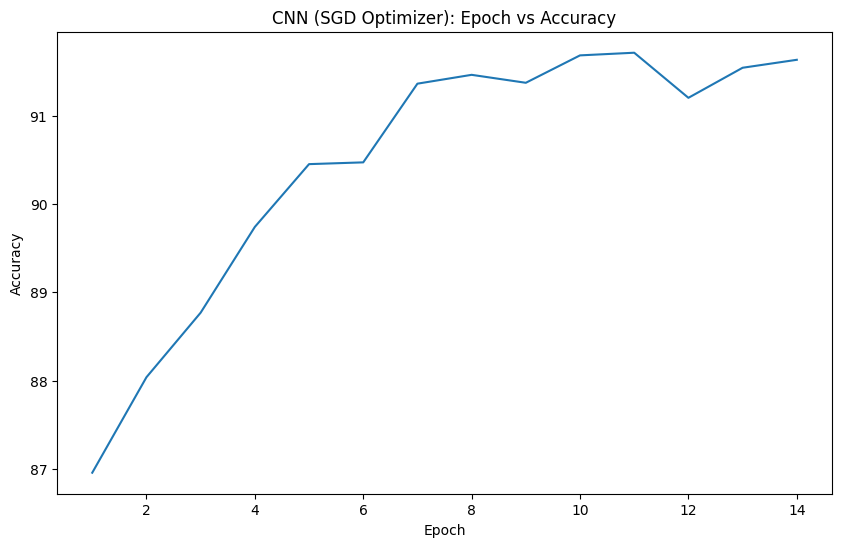

In [5]:
print(accuracies)
epochs = list(range(1, len(accuracies) + 1))
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracies, linestyle='-')
plt.title('CNN (SGD Optimizer): Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#### CNN (Optimizer: Adam)

In [6]:
# optimal hyperparameters:
batch_size = 64
fc_layer_size = 512
activation_fn = nn.PReLU()

train_loader, test_loader = load_dataset(train_dataset, test_dataset, batch_size)
train_loader, test_loader = prep_pixels(train_loader, test_loader)

model = define_model(fc_layer_size, activation_fn)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

accuracies = []

best_accuracy = 0.0
patience_counter = 0

start_time = datetime.datetime.now()
for epoch in range(20):
    pbar = tqdm(enumerate(train_loader), total=len(train_loader))
    model.train()
    for i, (images, labels) in pbar:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i + 1) % 200 == 0:
            pbar.set_description(f'Epoch [{epoch + 1}/{20}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item()}')

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        pbar_test = tqdm(test_loader)
        for images, labels in pbar_test:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            pbar_test.set_description(f'Accuracy: {100 * correct / total:.2f}%')

        accuracy = 100 * correct / total
        accuracies.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            patience_counter = 0

        else:
            patience_counter += 1
            if patience_counter >= 3:
                print(f'Early stopping at epoch {epoch + 1}')
                break

end_time = datetime.datetime.now()
print(f'Final accuracy: {best_accuracy:.2f}%')
optim_acc.append(best_accuracy)
print(f'Training time: {end_time - start_time}')

Epoch [1/20], Step [800/938], Loss: 0.23347313702106476: 100%|██████████| 938/938 [00:50<00:00, 18.40it/s]
Accuracy: 87.39%: 100%|██████████| 157/157 [00:03<00:00, 42.31it/s]
Epoch [2/20], Step [800/938], Loss: 0.3538375496864319: 100%|██████████| 938/938 [00:51<00:00, 18.16it/s] 
Accuracy: 88.95%: 100%|██████████| 157/157 [00:03<00:00, 42.12it/s]
Epoch [3/20], Step [800/938], Loss: 0.43642526865005493: 100%|██████████| 938/938 [00:51<00:00, 18.27it/s]
Accuracy: 88.74%: 100%|██████████| 157/157 [00:03<00:00, 42.16it/s]
Epoch [4/20], Step [800/938], Loss: 0.1639706939458847: 100%|██████████| 938/938 [00:53<00:00, 17.52it/s] 
Accuracy: 88.47%: 100%|██████████| 157/157 [00:03<00:00, 40.78it/s]
Epoch [5/20], Step [800/938], Loss: 0.1469258964061737: 100%|██████████| 938/938 [01:02<00:00, 14.90it/s] 
Accuracy: 88.42%: 100%|██████████| 157/157 [00:04<00:00, 33.90it/s]

Early stopping at epoch 5
Final accuracy: 88.95%
Training time: 0:04:50.121747


[87.39, 88.95, 88.74, 88.47, 88.42]


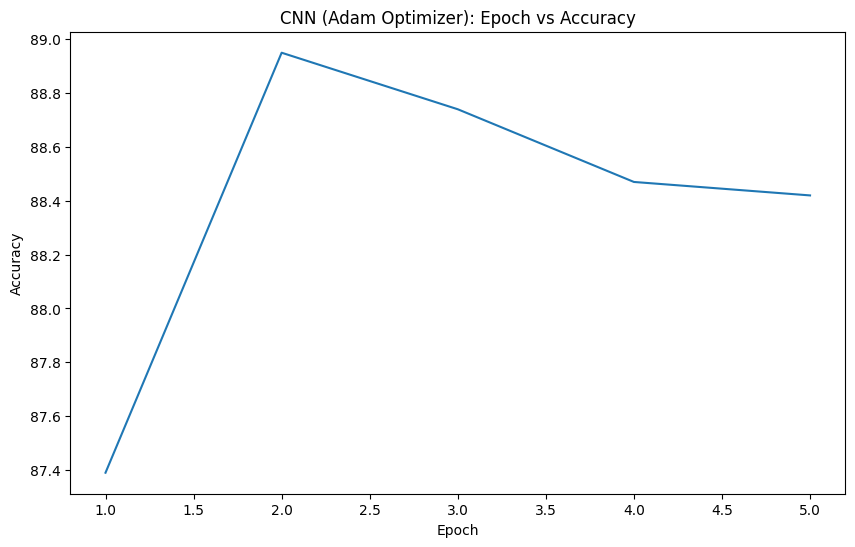

In [7]:
print(accuracies)
epochs = list(range(1, len(accuracies) + 1))
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracies, linestyle='-')
plt.title('CNN (Adam Optimizer): Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#### CNN (Optimizer: NAdam)

In [8]:
# optimal hyperparameters:
batch_size = 64
fc_layer_size = 512
activation_fn = nn.PReLU()

train_loader, test_loader = load_dataset(train_dataset, test_dataset, batch_size)
train_loader, test_loader = prep_pixels(train_loader, test_loader)

model = define_model(fc_layer_size, activation_fn)
criterion = nn.CrossEntropyLoss()
optimizer = optim.NAdam(model.parameters(), lr=0.01)

accuracies = []

best_accuracy = 0.0
patience_counter = 0

start_time = datetime.datetime.now()
for epoch in range(20):
    pbar = tqdm(enumerate(train_loader), total=len(train_loader))
    model.train()
    for i, (images, labels) in pbar:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i + 1) % 200 == 0:
            pbar.set_description(f'Epoch [{epoch + 1}/{20}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item()}')

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        pbar_test = tqdm(test_loader)
        for images, labels in pbar_test:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            pbar_test.set_description(f'Accuracy: {100 * correct / total:.2f}%')

        accuracy = 100 * correct / total
        accuracies.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            patience_counter = 0

        else:
            patience_counter += 1
            if patience_counter >= 3:
                print(f'Early stopping at epoch {epoch + 1}')
                break

end_time = datetime.datetime.now()
print(f'Final accuracy: {best_accuracy:.2f}%')
optim_acc.append(best_accuracy)
print(f'Training time: {end_time - start_time}')

Epoch [1/20], Step [800/938], Loss: 0.24455596506595612: 100%|██████████| 938/938 [01:01<00:00, 15.17it/s]
Accuracy: 85.04%: 100%|██████████| 157/157 [00:04<00:00, 36.66it/s]
Epoch [2/20], Step [800/938], Loss: 0.20507438480854034: 100%|██████████| 938/938 [01:02<00:00, 15.03it/s]
Accuracy: 85.58%: 100%|██████████| 157/157 [00:05<00:00, 27.21it/s]
Epoch [3/20], Step [800/938], Loss: 0.10352529585361481: 100%|██████████| 938/938 [01:20<00:00, 11.58it/s]
Accuracy: 86.88%: 100%|██████████| 157/157 [00:05<00:00, 26.40it/s]
Epoch [4/20], Step [800/938], Loss: 0.11718630790710449: 100%|██████████| 938/938 [01:28<00:00, 10.56it/s]
Accuracy: 87.28%: 100%|██████████| 157/157 [00:04<00:00, 33.78it/s]
Epoch [5/20], Step [800/938], Loss: 0.21808305382728577: 100%|██████████| 938/938 [01:17<00:00, 12.04it/s]
Accuracy: 88.64%: 100%|██████████| 157/157 [00:05<00:00, 28.84it/s]
Epoch [6/20], Step [800/938], Loss: 0.37673214077949524: 100%|██████████| 938/938 [01:18<00:00, 11.98it/s] 
Accuracy: 86.74%:

Early stopping at epoch 11
Final accuracy: 89.17%
Training time: 0:15:31.967905


[85.04, 85.58, 86.88, 87.28, 88.64, 86.74, 88.83, 89.17, 88.91, 86.56, 88.67]


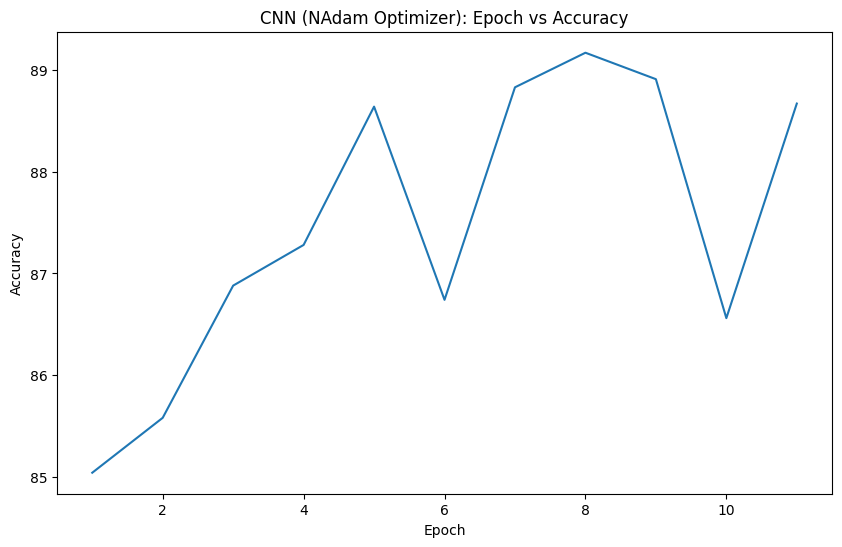

In [9]:
print(accuracies)
epochs = list(range(1, len(accuracies) + 1))
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracies, linestyle='-')
plt.title('CNN (NAdam Optimizer): Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

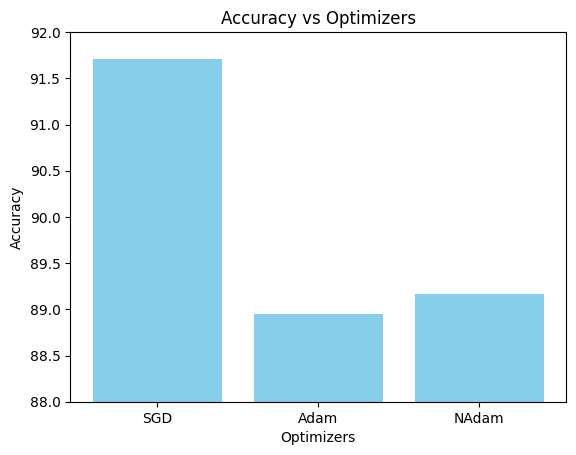

In [10]:
from matplotlib import pyplot as plt

optim_names = ["SGD", "Adam", "NAdam"]

fig, ax = plt.subplots()
ax.bar(optim_names, optim_acc, color='skyblue')
ax.set_xlabel('Optimizers')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Optimizers')
plt.ylim([88, 92]) 
plt.show()